In [1]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
plt.rcParams['figure.figsize'] = (15,5)

```cpp
void StandardN_next(StandardN *unit, int inNumSamples)
{
	float *out = ZOUT(0);
	float freq = ZIN0(0);
	double k = ZIN0(1);
	double x0 = ZIN0(2);
	double y0 = ZIN0(3);

	double xn = unit->xn;
	double output = (xn - PI) * RECPI;
	double yn = unit->yn;
	float counter = unit->counter;

	float samplesPerCycle;
	if(freq < unit->mRate->mSampleRate)
		samplesPerCycle = unit->mRate->mSampleRate / sc_max(freq, 0.001f);
	else samplesPerCycle = 1.f;

	if((unit->x0 != x0) || (unit->y0 != y0)){
		unit->x0 = xn = x0;
		unit->y0 = yn = y0;
	}

	for (int i=0; i<inNumSamples; ++i) {
		if(counter >= samplesPerCycle){
			counter -= samplesPerCycle;

			yn = yn + k * sin(xn);
			yn = mod2pi(yn);

			xn = xn + yn;
			xn = mod2pi(xn);

			output = (xn - PI) * RECPI;
		}
		counter++;
		ZXP(out) =  output;
	}

	unit->xn = xn;
	unit->yn = yn;
	unit->counter = counter;
}
```

In [3]:
RECPI = 0.3183098861837907

def mod2pi(x):
    return x % (2 * math.pi)

def nextStandardN(k, x0, y0):
    yn = y0
    xn = x0
    while True:
        yn = yn + k * math.sin(xn)
        yn = mod2pi(yn)

        xn = xn + yn
        xn = mod2pi(xn)

        yield (xn - math.pi) * RECPI

In [4]:
num_samps = 100000
sn = nextStandardN(1.0, 0.5, 0)
x = np.array([])
for i, xi in zip(range(num_samps), sn):
    x = np.append(x, xi)

In [5]:
x

array([-0.68823917, -0.27137966,  0.38515776, ..., -0.54633482,
        0.10499075,  0.65321895])

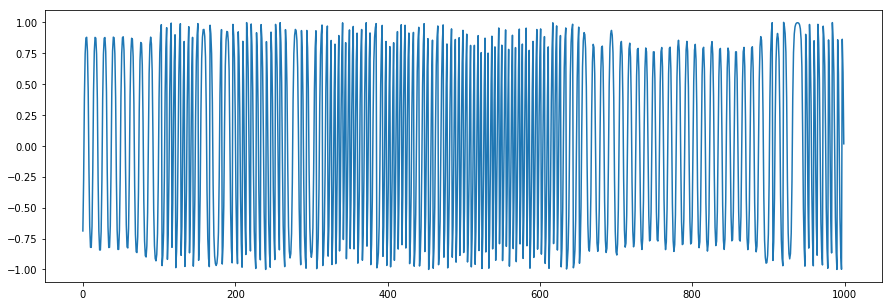

In [6]:
plt.plot(x[:1000])

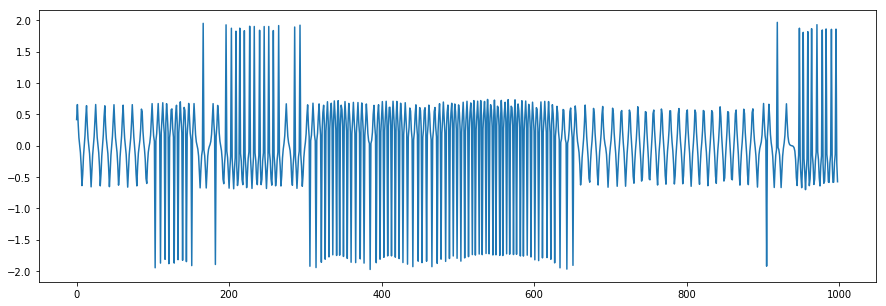

In [7]:
plt.plot(np.diff(x[:1000]))

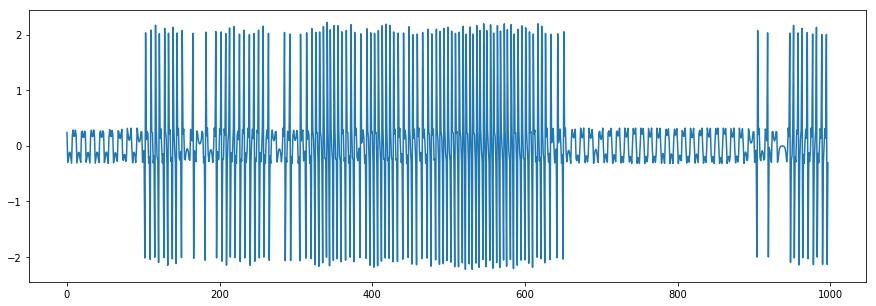

In [8]:
plt.plot(np.diff(np.diff(x[:1000])))

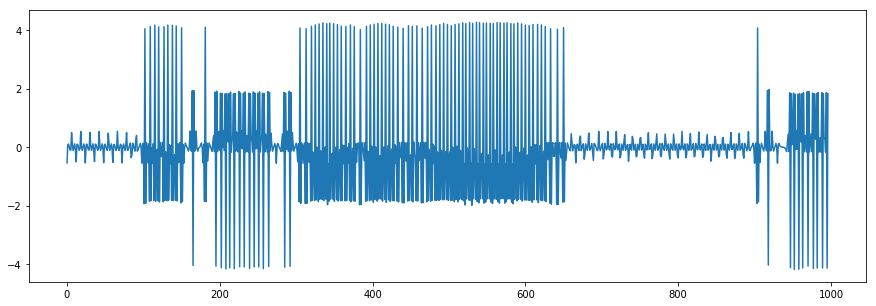

In [9]:
plt.plot(np.diff(np.diff(np.diff(x[:1000]))))

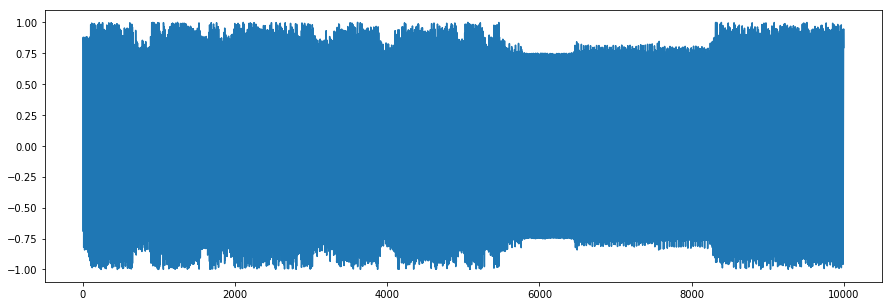

In [10]:
plt.plot(x[:10000])

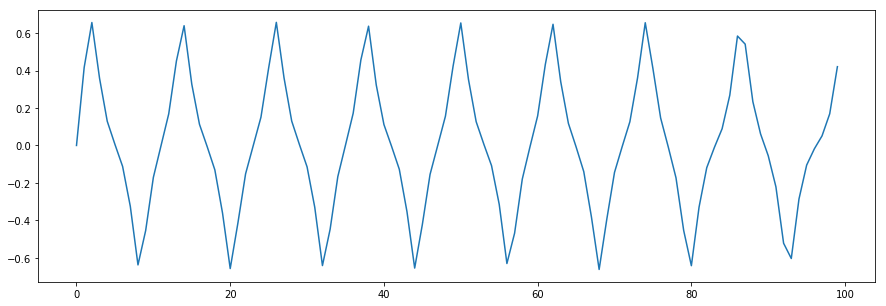

In [11]:
plt.plot(np.append(np.array([0]), np.diff(x[:100])))

In [12]:
x[:10]

array([-0.68823917, -0.27137966,  0.38515776,  0.74387837,  0.87323314,
        0.87914552,  0.76708615,  0.44234782, -0.19549369, -0.64990164])

In [13]:
np.append(np.array([0]), np.diff(x[:10]))

array([ 0.        ,  0.41685951,  0.65653742,  0.35872061,  0.12935477,
        0.00591237, -0.11205937, -0.32473833, -0.6378415 , -0.45440796])

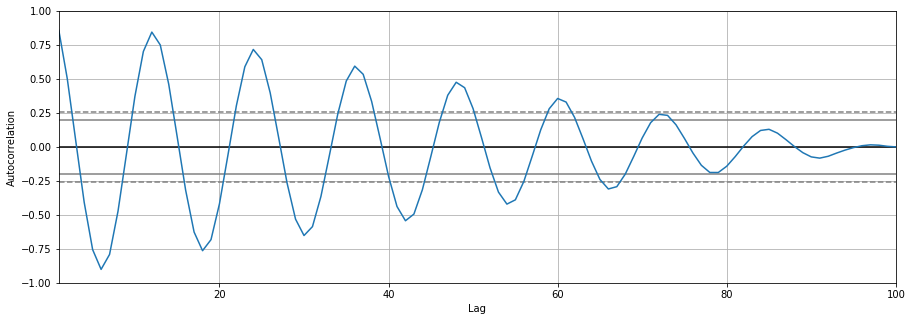

In [14]:
pd.plotting.autocorrelation_plot(x[:100])

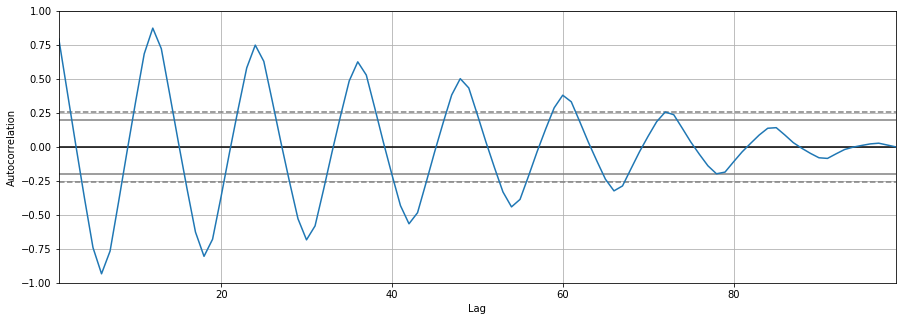

In [15]:
pd.plotting.autocorrelation_plot(np.diff(x[:100]))